# Plot the Annular mode indices in the CMIP6 for the extended winter



## Import modules


In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# %matplotlib inline

from read_AM_index_mod import Reanalysis, CMIP6

with open("model_list.txt", "r") as f:
    model_list = f.readlines()
    model_list = [d.replace("\n", "") for d in model_list]
model_list.remove("CESM2")
model_list.remove("CESM2-WACCM")
# model_list.remove("HadGEM3-GC31-LL")
# model_list.remove("HadGEM3-GC31-MM")
model_list.remove("KACE")
# model_list.remove("UKESM1")

plev = [1000.,  850.,  700.,  500.,  250.,  100.,   50.,   10.]

## Load JRA55 and CMIP6 data

In [2]:
D0 = Reanalysis(name_dir='jra_55', year_start=1958, year_end=2014, plev=plev, name='JRA55', \
        annual_cycle_fft=4, running_mean=0, save_index=True)
NAM, NAM_mean, NAM_anomaly = D0.cal_AM_anomaly('NAM')
D0.NAM_mean = NAM_mean
SAM, SAM_mean, SAM_anomaly = D0.cal_AM_anomaly('SAM')
D0.SAM_mean = SAM_mean
D0.NAM_slice, D0.SAM_slice = D0.slice_data(month_start=11, len_slice=150, month_start2=8)
print(D0.name)
# D0.load_data()

D_list = []
for model in model_list:
    D = CMIP6(name_dir=model, year_start=1958, year_end=2014, plev=plev, name=model, source_dir='cmip6', \
            annual_cycle_fft=4, running_mean=0, save_index=True)
    NAM, NAM_mean, NAM_anomaly = D.cal_AM_anomaly('NAM')
    D.NAM_mean = NAM_mean
    SAM, SAM_mean, SAM_anomaly = D.cal_AM_anomaly('SAM')
    D.SAM_mean = SAM_mean
    D.NAM_slice, D.SAM_slice = D.slice_data(month_start=11, len_slice=150, month_start2=8)
    print(D.name)
    # D.load_data()
    D_list.append(D)

print(f"total number of models: {len(D_list)}")


Reading from saved data ......
JRA55
Reading from saved data ......
ACCESS-CM2
Reading from saved data ......
BCC-ESM1
Reading from saved data ......
CanESM5
Reading from saved data ......
CNRM-CM6
Reading from saved data ......
CNRM-CM6-HR
Reading from saved data ......
CNRM-ESM2
Reading from saved data ......
EC-Earth3
Reading from saved data ......
FGOALS-f3-L
Reading from saved data ......
FGOALS-g3
Reading from saved data ......
GFDL-ESM4
Reading from saved data ......
HadGEM3-GC31-LL
Reading from saved data ......
HadGEM3-GC31-MM
Reading from saved data ......
INM-CM4
Reading from saved data ......
INM-CM5
Reading from saved data ......
IPSL-CM6A-LR
Reading from saved data ......
MIROC6
Reading from saved data ......
MIROC-ES2L
Reading from saved data ......
MPI-ESM-1-2-HAM
Reading from saved data ......
MPI-ESM1-2-HR
Reading from saved data ......
MPI-ESM1-2-LR
Reading from saved data ......
MRI-ESM2
Reading from saved data ......
NorESM2-LM
Reading from saved data ......
NorESM

## Plot the annual cycle of Z10

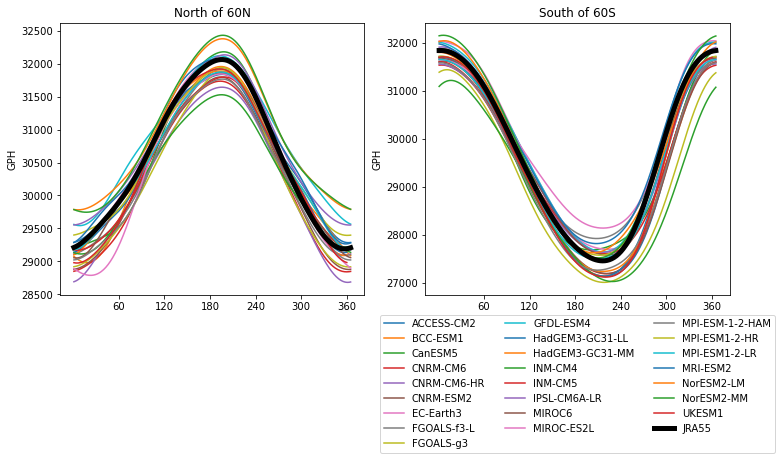

In [3]:
def plot_1year(data, p_level=10, plot="NAM"):
        ysize = data.length_of_year
        time = np.linspace(1.0, ysize, ysize)
        ki = np.isin(data.level, p_level)

        if plot == "NAM":
                ax1.plot(time, data.NAM_mean[:, ki], label=data.name)
        else:
                ax1.plot(time, data.SAM_mean[:, ki], label=data.name)
        ax1.set_xticks(np.linspace(60, 360, 6))
        ax1.set_ylabel('GPH')
        if plot == "NAM":
                ax1.set_title('North of 60N')
        else:
                ax1.set_title('South of 60S')
        # ax1.set_title(f'{data.name}')
        # ax1.axis([1, 365, -4, 4])
        #ax1.axhline(y=0, color='k', linestyle='--')
        ax1.grid()

ysize = D0.length_of_year # including calendar = "360_day"
time = np.linspace(1, ysize, ysize)
p_level = 10
ki = np.isin(D0.level, p_level)

fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1, 2, 1)
for i, D in enumerate(D_list):
    plot_1year(D, p_level=p_level, plot="NAM")
ax1.plot(time, D0.NAM_mean[:, ki], color='k', linewidth=5, label=D0.name)

ax1 = fig.add_subplot(1, 2, 2)
for i, D in enumerate(D_list):
    plot_1year(D, p_level=p_level, plot="SAM")
ax1.plot(time, D0.SAM_mean[:, ki], color='k', linewidth=5, label=D0.name)

legend = ax1.legend(bbox_to_anchor=(0.5,-0.6), loc='lower center', ncol=3)

# if True:
#         plt.savefig('Figs/Z10_annual_cyle.png', transparent=True)


## Plot the std of AM indices in the annual cycle

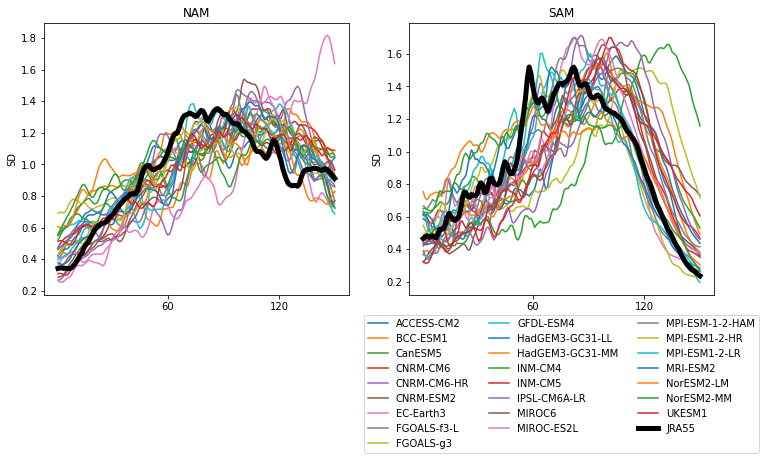

In [4]:
def plot_1year(data, p_level=10, plot="NAM"):
        ysize = data.NAM_slice.shape[1]     # data.length_of_year
        time = np.linspace(1.0, ysize, ysize)
        ki = np.isin(data.level, p_level)

        if plot == "NAM":
                ax1.plot(time, np.std(data.NAM_slice[:, :, ki], axis=0), label=data.name)

        else:
                ax1.plot(time, np.std(data.SAM_slice[:, :, ki], axis=0), label=data.name)
        ax1.set_xticks(np.linspace(60, 360, 6))
        ax1.set_ylabel('SD')
        if plot == "NAM":
                ax1.set_title('NAM')
        else:
                ax1.set_title('SAM')
        # ax1.set_title(f'{data.name}')
        # ax1.axis([1, 365, -4, 4])
        #ax1.axhline(y=0, color='k', linestyle='--')
        ax1.grid()

ysize = D0.NAM_slice.shape[1]     # D0.length_of_year # including calendar = "360_day"
time = np.linspace(1, ysize, ysize)
p_level = 10
ki = np.isin(D0.level, p_level)

fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1, 2, 1)
for i, D in enumerate(D_list):
    plot_1year(D, p_level=p_level, plot="NAM")
ax1.plot(time, np.std(D0.NAM_slice[:, :, ki], axis=0), color='k', linewidth=5, label=D0.name)

ax1 = fig.add_subplot(1, 2, 2)
for i, D in enumerate(D_list):
    plot_1year(D, p_level=p_level, plot="SAM")
ax1.plot(time, np.std(D0.SAM_slice[:, :, ki], axis=0), color='k', linewidth=5, label=D0.name)

legend = ax1.legend(bbox_to_anchor=(0.5,-0.6), loc='lower center', ncol=3)

# if True:
#         plt.savefig('Figs/AM_annual_cyle_slice.png', transparent=True)


## Plot the covariance function

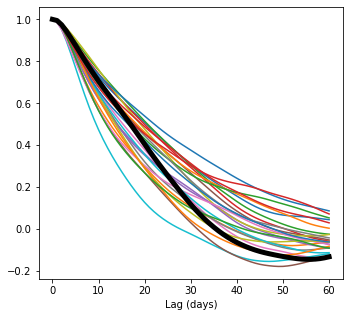

In [6]:
from AM_plot2_mod import cov_lag, plot_cov

lag_time = 60
p_level = 10
y = D0.NAM_slice.data
k = np.isin(D0.level, p_level).nonzero()[0][0]
lags = np.linspace(0, lag_time, lag_time+1, dtype=int)

Ct = np.array([cov_lag(y[:, :, k], lag) for lag in lags])

fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1, 2, 1)
for i, D in enumerate(D_list):
    plot_cov(D.NAM_slice.data, D.level, p_level=p_level, lag_time=lag_time, ax1=ax1, model=D.name)
ax1.plot(lags, Ct/Ct[0], color='k', linewidth=5, label=D0.name)


# # if True:
# #         plt.savefig('Figs/Z10_lag_slice.png', transparent=True)


## Plot lagged regression


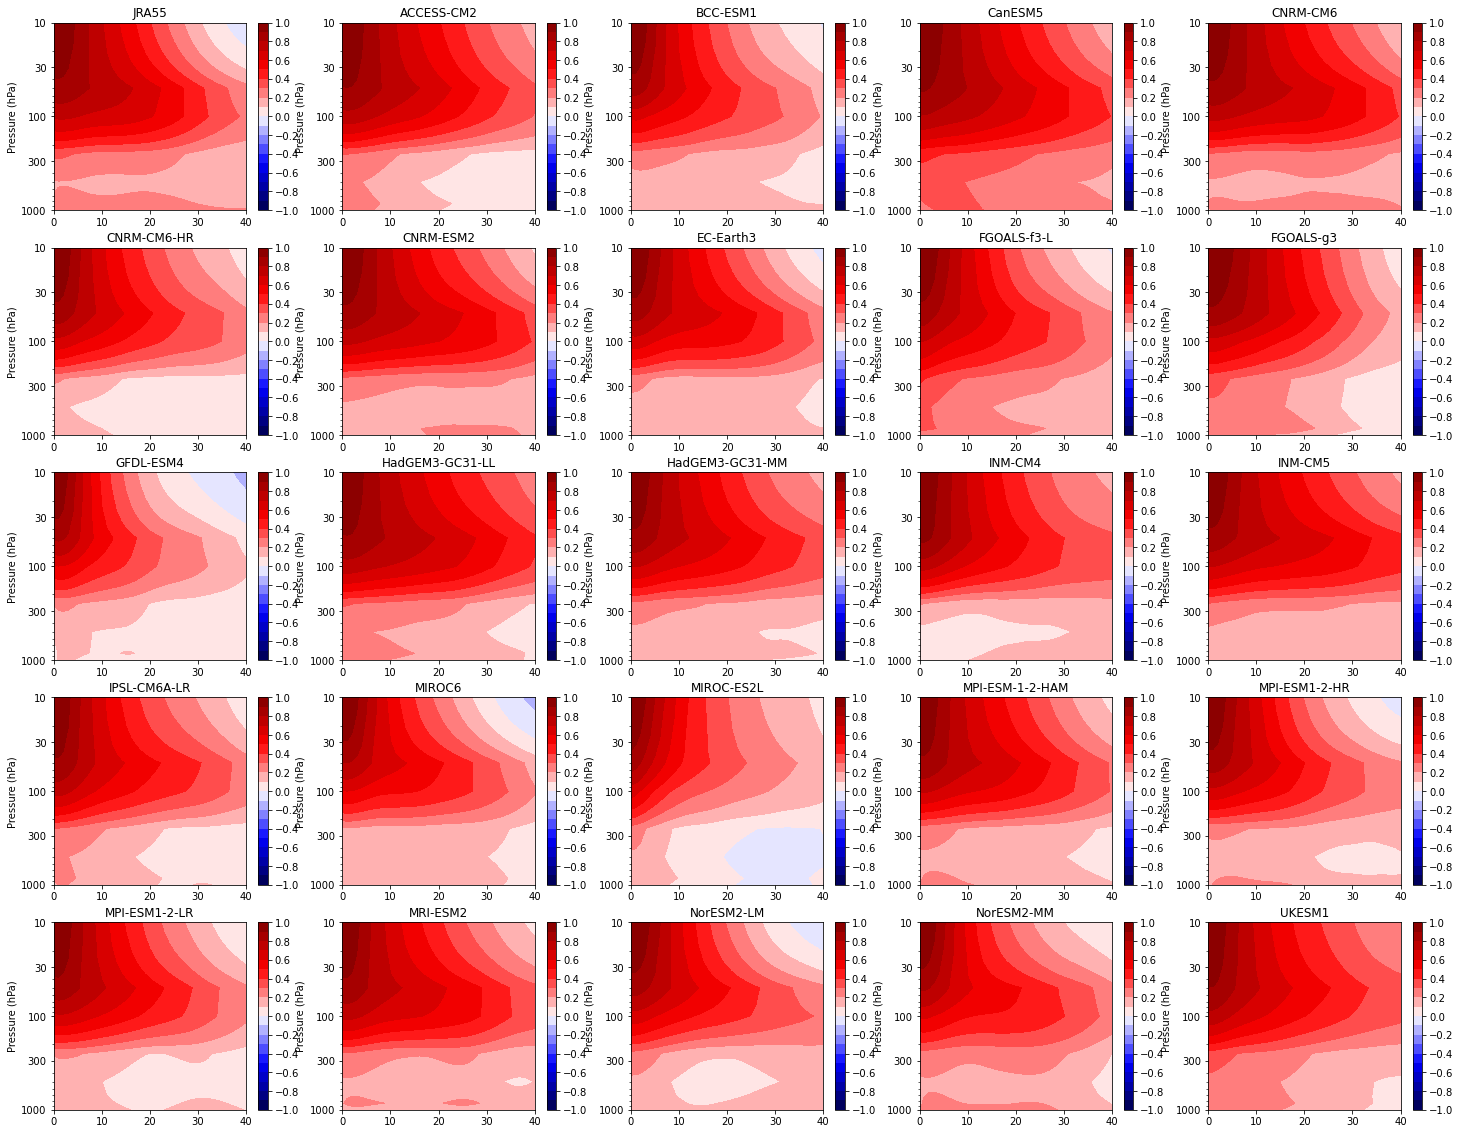

In [7]:
# from AM_plot2_mod import plot_lag_reg

#=============================================================
# plot lagged covariance
#=============================================================
def plot_lag_reg(y, p, lag_time=40, model=None):

    kk = np.isin(p, 10).nonzero()[0][0]
    lags = np.linspace(0, lag_time, lag_time+1, dtype=int)

    # Ct_p = np.empty((lag_time+1, y.shape[2]))

    Ct_p = np.array([cov_lag(y[:, :, :], lag, y[:, :, kk]) for lag in lags])

    # for k in range(y.shape[2]):
    #     Ct_p[:, k] = cov_2d(y[:, :, k], lag_time, y[:, :, kk])
        
    cmax = 1
    cm = 'seismic' # 'bwr' 
    # fig = plt.figure(figsize=(12,5))
    # ax = fig.add_subplot(1,2,1)
    plt.contourf(lags, p, Ct_p.T, np.linspace(-cmax, cmax, 21), cmap=cm)
    cbar = plt.colorbar()
    cbar.set_ticks(np.linspace(-cmax, cmax, 11))
    plt.gca().invert_yaxis()
    # plt.xlabel('lag (days)')
    plt.ylabel('Pressure (hPa)')
    plt.yscale('log')
    plt.yticks([10, 30, 100, 300, 1000])
    plt.gca().get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
    plt.title(f"{model}")


fig = plt.figure(figsize=(25,20))
ax1 = fig.add_subplot(5, 5, 1)
y = D0.NAM_slice.data
p = D0.level
plot_lag_reg(y, p, model=D0.name)

for i, D in enumerate(D_list):
    ax1 = fig.add_subplot(5, 5, i+2)
    y = D.NAM_slice.data
    p = D.level
    plot_lag_reg(y, p, model=D.name)


# if True:
#         plt.savefig('Figs/AM_reg_slice.png', transparent=True)

## Make composite for strong and weak vortex events


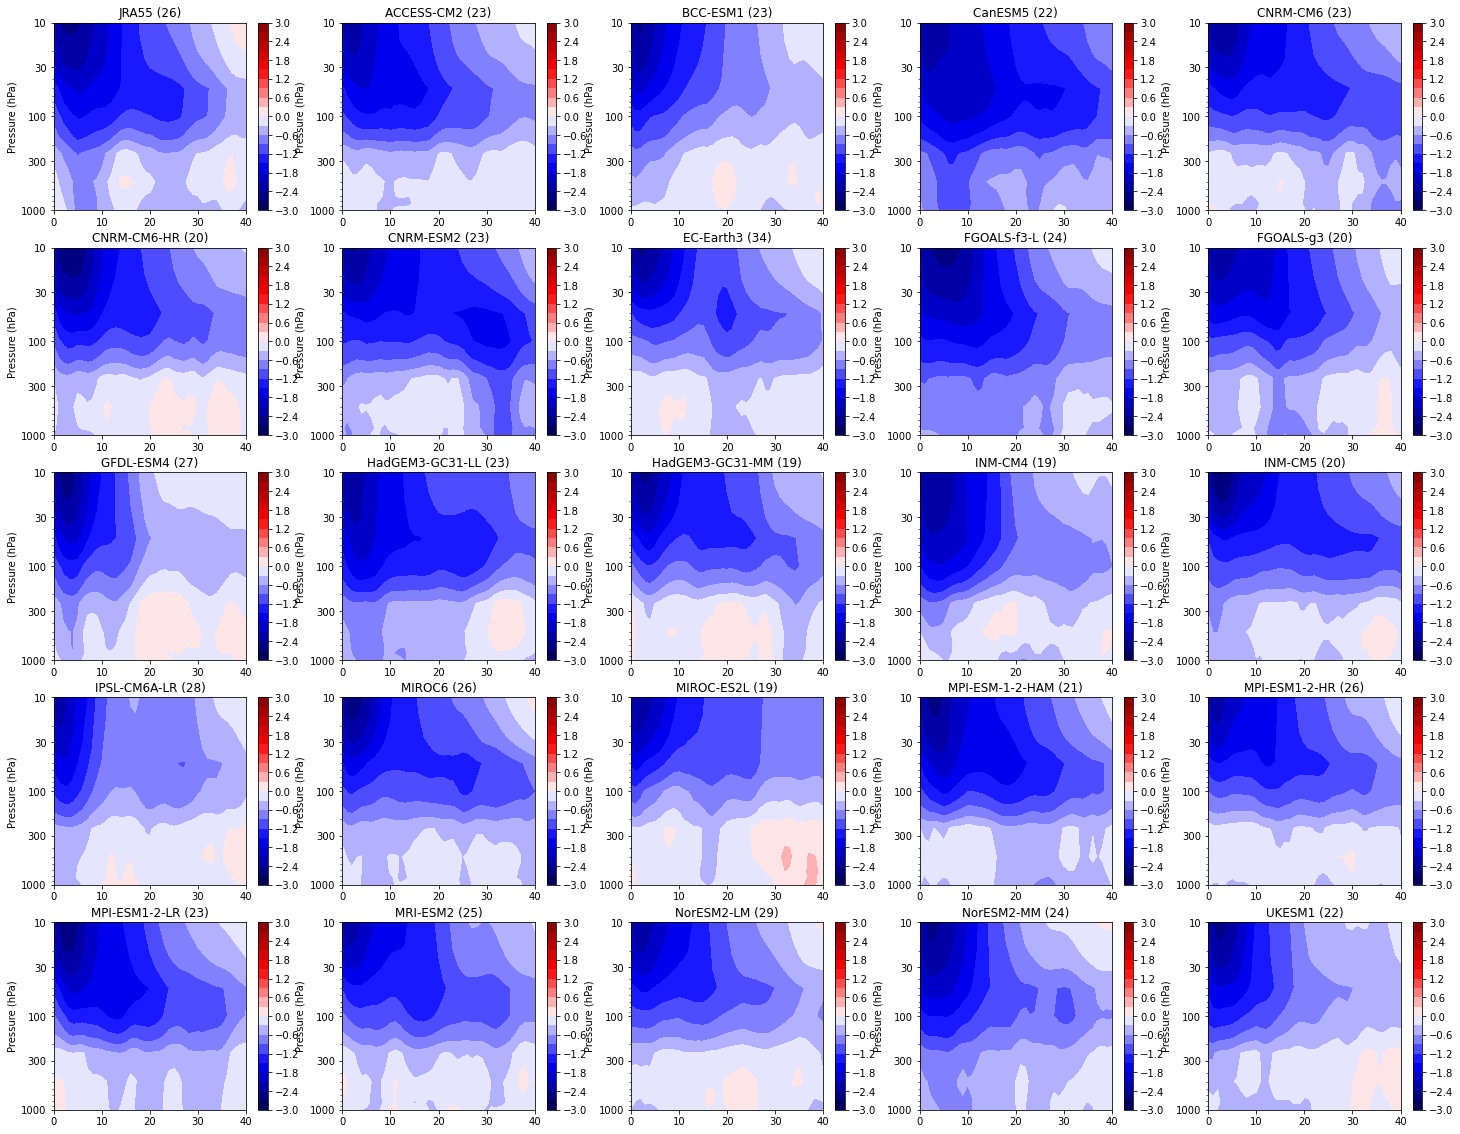

In [8]:
from AM_plot2_mod import plot_event

fig = plt.figure(figsize=(25,20))
ax1 = fig.add_subplot(5, 5, 1)
y = D0.NAM_slice.data
p = D0.level
plot_event(y, p, lag_time=40, event='negative', model=D0.name)

for i, D in enumerate(D_list):
    ax1 = fig.add_subplot(5, 5, i+2)
    y = D.NAM_slice.data
    p = D.level
    plot_event(y, p, lag_time=40, event='negative', model=D.name)

# if True:
#         plt.savefig('Figs/Z10_events_slice.png', transparent=True)

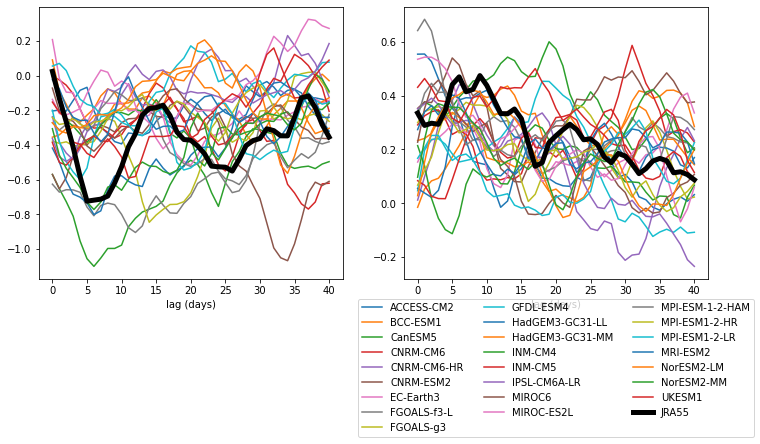

In [9]:
from AM_plot2_mod import plot_event2

fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1, 2, 1)
for i, D in enumerate(D_list):
    y = D.NAM_slice.data
    p = D.level
    plot_event2(y, p, lag_time=40, event='negative', model=D.name)

y = D0.NAM_slice.data
p = D0.level
plot_event2(y, p, lag_time=40, event='negative', model=D0.name)

ax1 = fig.add_subplot(1, 2, 2)
for i, D in enumerate(D_list):
    y = D.NAM_slice.data
    p = D.level
    plot_event2(y, p, lag_time=40, event='postive', model=D.name)

y = D0.NAM_slice.data
p = D0.level
plot_event2(y, p, lag_time=40, event='positive', model=D0.name)

legend = ax1.legend(bbox_to_anchor=(0.5,-0.6), loc='lower center', ncol=3)

# if True:
#         plt.savefig('Figs/Z10_events_850_slice.png', transparent=True)